In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N

In [17]:
if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.5, +0.75, 3000 // 2
    ymin, ymax, yn = -1.25, +1.25, 2500 // 2
    maxiter = 100
    horizon = 2.0 ** 40
    log_horizon = np.log2(np.log(horizon))
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

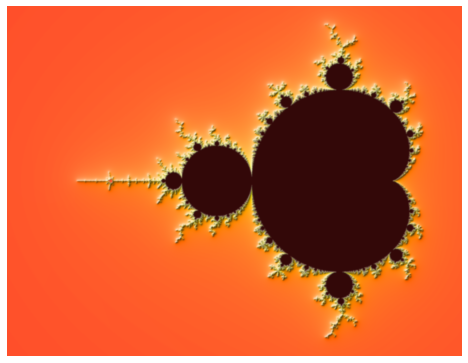

In [19]:
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

    dpi = 70
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

#     # Some advertisement for matplotlib
#     year = time.strftime("%Y")
#     text = ("The Mandelbrot fractal set\n"
#             "Rendered with matplotlib %s, %s - https://matplotlib.org"
#             % (matplotlib.__version__, year))
#     ax.text(xmin+.05, ymin+.05, text, color="white", fontsize=12, alpha=0.5)

    plt.show()